In [ ]:
%matplotlib inline
import os
import pandas as pd
from glob import glob
import numpy as np
import tensorflow as tf

In [ ]:
from keras import layers
from keras import models
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
# from path import Path

In [ ]:
import IPython.display as ipd

import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers




from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL
from PIL import Image
from numpy import asarray
def images(files):
    for i in range(len(files)):
        file_name='/content/drive/MyDrive/Mars/finalaudio'+'/'+str(files[i])
   

        X, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
        fig = plt.figure(figsize=[1,1])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
    
     
        S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
        file_name_1  ='/content/drive/MyDrive/Mars/finalaud' +str('/')+ str(files[i])+'.jpg'
 
        plt.savefig(file_name_1, dpi=500, bbox_inches='tight',pad_inches=0)
        plt.close()
            

In [ ]:
import csv

In [ ]:
audio_directory = '/content/drive/MyDrive/Mars/finalaudio'
filenames= []
for folder in os.listdir(audio_directory):
    if folder.endswith('.flac'):
      filenames.append(folder)

with open('a.csv', 'w', newline='') as csvfile:
   csvwriter = csv.writer(csvfile)
   csvwriter.writerow(['audio_filenames'])
   for filename in filenames:
     csvwriter.writerow([filename])

In [ ]:
df = pd.read_csv("a.csv")
xf = pd.read_csv("a.csv")

dff = pd.read_csv("a.csv")

df


,audio_filenames
0,5338-284437-0027.flac
1,5338-284437-0002.flac
2,5338-284437-0033.flac
3,5338-24615-0001.flac
4,5338-284437-0015.flac
...,...
1739,3081-166546-0028.flac
1740,3081-166546-0082.flac
1741,3081-166546-0087.flac
1742,3081-166546-0081.flac


In [ ]:
def make_label(files):
    return str(files.split('-')[0])


df['label'] =df['audio_filenames'].apply(make_label)
df['code'] = pd.factorize(df['label'])[0] + 1
df=df.drop(['label'],axis=1)
df

,audio_filenames,code
0,5338-284437-0027.flac,1
1,5338-284437-0002.flac,1
2,5338-284437-0033.flac,1
3,5338-24615-0001.flac,1
4,5338-284437-0015.flac,1
...,...,...
1739,3081-166546-0028.flac,6
1740,3081-166546-0082.flac,6
1741,3081-166546-0087.flac,6
1742,3081-166546-0081.flac,6


In [ ]:
def make_jpg(files):
    return str(files.split('.')[0])+'.flac.jpg'
df['audio_filenames'] = df['audio_filenames'].apply(make_jpg)

In [ ]:
df

,audio_filenames,code
0,5338-284437-0027.flac.jpg,1
1,5338-284437-0002.flac.jpg,1
2,5338-284437-0033.flac.jpg,1
3,5338-24615-0001.flac.jpg,1
4,5338-284437-0015.flac.jpg,1
...,...,...
1739,3081-166546-0028.flac.jpg,6
1740,3081-166546-0082.flac.jpg,6
1741,3081-166546-0087.flac.jpg,6
1742,3081-166546-0081.flac.jpg,6


In [ ]:
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
train_image = []
for i in tqdm(range(len(df))):
    img = image.load_img('/content/drive/MyDrive/Mars/finalaudio/'+df['audio_filenames'][i], target_size=(128,128,3), grayscale=False)
    # print(img)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
                         

X[5]

100%|██████████| 1744/1744 [01:12<00:00, 24.09it/s] 


array([[[0.17254902, 0.1254902 , 0.28235295],
        [0.00392157, 0.00392157, 0.        ],
        [0.1882353 , 0.08235294, 0.4       ],
        ...,
        [0.03921569, 0.00784314, 0.05882353],
        [0.00784314, 0.00784314, 0.05490196],
        [0.        , 0.        , 0.01568628]],

       [[0.19607843, 0.12941177, 0.30588236],
        [0.01568628, 0.        , 0.        ],
        [0.20784314, 0.07843138, 0.42745098],
        ...,
        [0.02352941, 0.        , 0.02745098],
        [0.        , 0.        , 0.02745098],
        [0.        , 0.        , 0.01568628]],

       [[0.1882353 , 0.11372549, 0.29411766],
        [0.02352941, 0.        , 0.        ],
        [0.23529412, 0.09411765, 0.47058824],
        ...,
        [0.01568628, 0.        , 0.01960784],
        [0.        , 0.        , 0.01960784],
        [0.        , 0.        , 0.01568628]],

       ...,

       [[0.3254902 , 0.05882353, 0.5019608 ],
        [0.39215687, 0.06666667, 0.4745098 ],
        [0.5411765 , 0

In [ ]:
from keras.utils import to_categorical

y=df['code'].values
y = to_categorical(y)

y.shape

(1744, 34)

In [ ]:
from sklearn.model_selection import train_test_split

X_trainn, X_test, y_trainn, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train, X_val , y_train , y_val = train_test_split(X_trainn, y_trainn,random_state=42, test_size= 0.1)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(34, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


In [ ]:
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size = 8)

Epoch 1/100
177/177 [==============================] - 2s 12ms/step - loss: 0.3016 - accuracy: 0.9164 - val_loss: 0.1588 - val_accuracy: 0.9554
Epoch 2/100
177/177 [==============================] - 2s 14ms/step - loss: 0.2512 - accuracy: 0.9221 - val_loss: 0.1809 - val_accuracy: 0.9490
Epoch 3/100
177/177 [==============================] - 2s 12ms/step - loss: 0.3222 - accuracy: 0.9079 - val_loss: 0.2546 - val_accuracy: 0.9108
Epoch 4/100
177/177 [==============================] - 3s 14ms/step - loss: 0.2353 - accuracy: 0.9263 - val_loss: 0.1502 - val_accuracy: 0.9554
Epoch 5/100
177/177 [==============================] - 2s 13ms/step - loss: 0.3079 - accuracy: 0.9164 - val_loss: 0.1526 - val_accuracy: 0.9618
Epoch 6/100
177/177 [==============================] - 3s 14ms/step - loss: 0.2805 - accuracy: 0.9186 - val_loss: 0.2601 - val_accuracy: 0.9172
Epoch 7/100
177/177 [==============================] - 3s 16ms/step - loss: 0.3062 - accuracy: 0.9093 - val_loss: 0.2822 - val_accuracy:

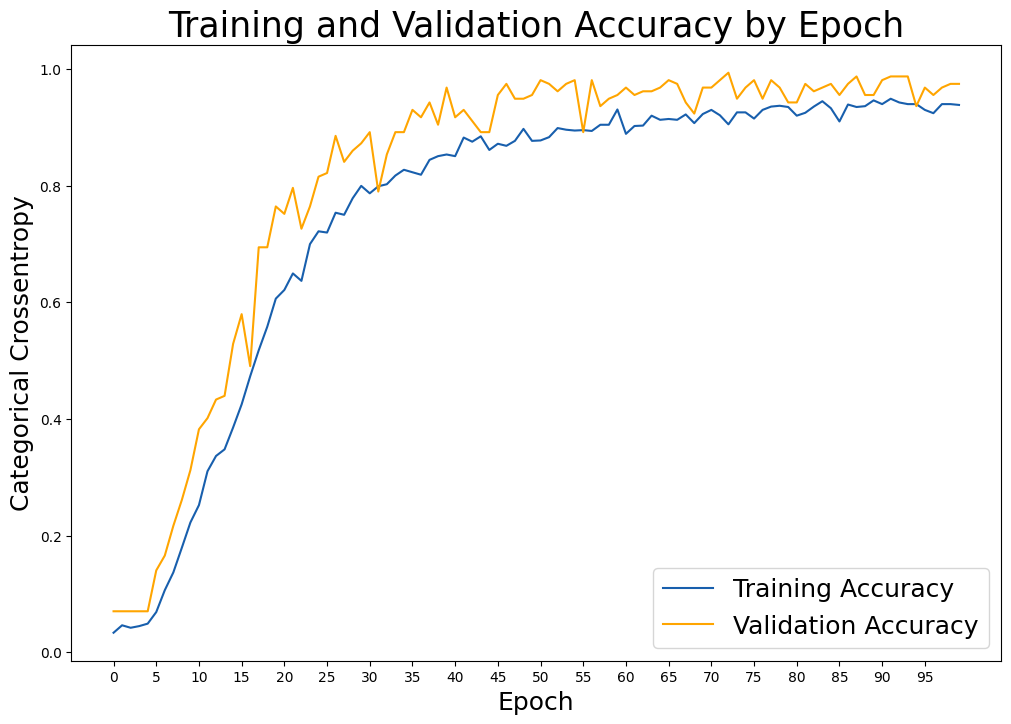

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();

In [ ]:
x_testres=model.predict(X_test)

6/6 [==============================] - 0s 9ms/step


In [ ]:
len(x_testres)

175

In [ ]:
f=[]
for i in range(len(x_testres)):
    f.append(np.argmax(x_testres[i]))
f[3]

12

In [ ]:
np.argmax(y_test[3])

12

In [ ]:
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size = 8)

Epoch 1/100
177/177 [==============================] - 16s 16ms/step - loss: 3.5235 - accuracy: 0.0354 - val_loss: 3.4955 - val_accuracy: 0.0514
Epoch 2/100
177/177 [==============================] - 2s 11ms/step - loss: 3.4941 - accuracy: 0.0333 - val_loss: 3.4807 - val_accuracy: 0.0400
Epoch 3/100
177/177 [==============================] - 2s 12ms/step - loss: 3.4800 - accuracy: 0.0361 - val_loss: 3.4818 - val_accuracy: 0.0400
Epoch 4/100
177/177 [==============================] - 2s 13ms/step - loss: 3.4156 - accuracy: 0.0694 - val_loss: 3.2205 - val_accuracy: 0.1086
Epoch 5/100
177/177 [==============================] - 2s 11ms/step - loss: 3.1828 - accuracy: 0.0963 - val_loss: 3.0435 - val_accuracy: 0.1314
Epoch 6/100
177/177 [==============================] - 2s 11ms/step - loss: 3.0109 - accuracy: 0.1218 - val_loss: 2.8620 - val_accuracy: 0.1657
Epoch 7/100
177/177 [==============================] - 2s 11ms/step - loss: 2.8754 - accuracy: 0.1501 - val_loss: 2.7795 - val_accuracy

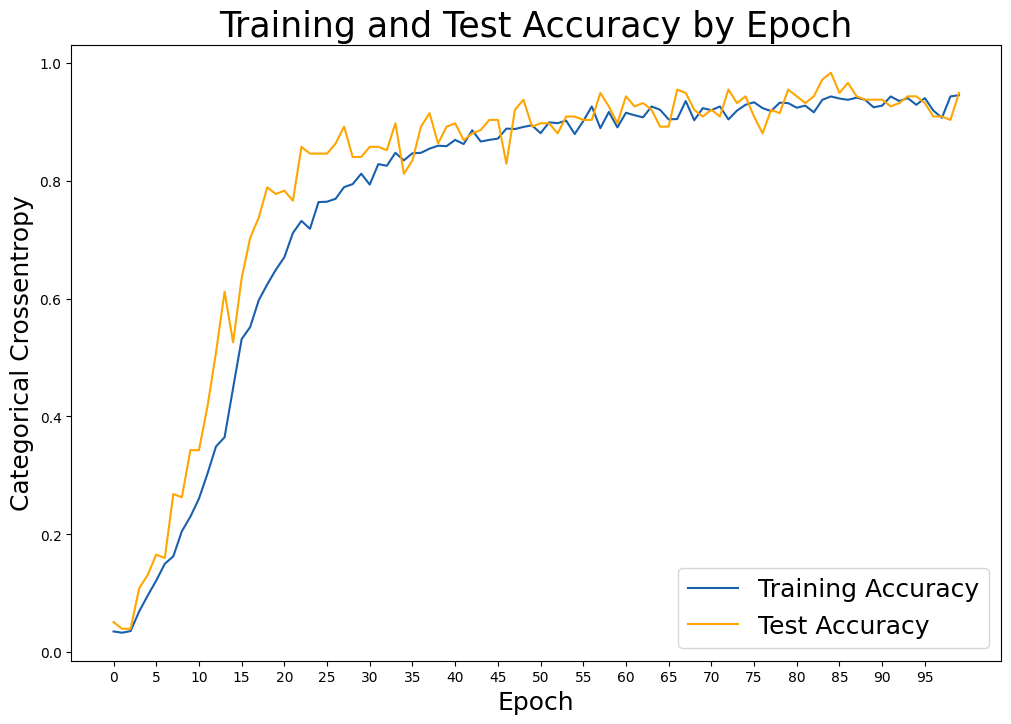

In [ ]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Test Accuracy', color='orange')

# Set title
plt.title('Training and Test Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();